# Visualizing Read Depth Statistics

The depth and number of mapped reads are visualized in a series of plots. The data come from `mosdepth` and `samtools flagstat` commands.

In [1]:
import os
import csv
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('seaborn-notebook')

## Mosdepth calculations of Coverage and Depth

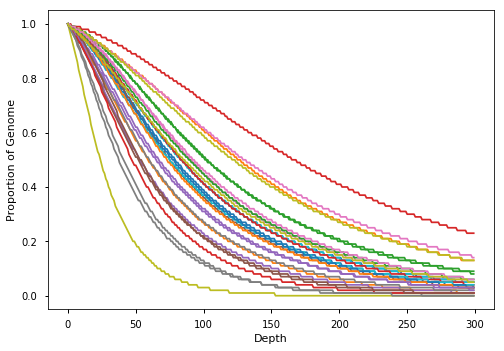

In [3]:
depth_dir = os.path.join('results', 'wes_stats')
depth_files = os.listdir(depth_dir)

plt.xlabel('Depth')
plt.ylabel('Proportion of Genome')
full_depth_list = []
for depth_file in depth_files:
    # Load and process file
    depth_file = os.path.join(depth_dir, depth_file)
    depth_df = pd.read_table(depth_file, names=['chrom', 'depth', 'prop_cov'])
    depth_df = depth_df.assign(sample_id = depth_file)
    
    # Set a reasonable cutoff to view bulk of distribution
    depth_sub_df = depth_df[depth_df['depth'] < 300]
    
    # There are chromosome specific estimates, here, view total
    ax = plt.plot('depth', 'prop_cov', data=depth_sub_df[depth_sub_df['chrom'] == 'total'])
    
    # Save processed files to list for later extraction
    full_depth_list.append(depth_df)

depth_fig_file = os.path.join('figures', 'mosdepth_estimation.pdf')
plt.savefig(depth_fig_file)

In [4]:
# Get full depth matrix
full_depth_df = pd.concat(full_depth_list)

# 50% of the exome is covered at what depth?
half_depth_df = full_depth_df[full_depth_df['prop_cov'] == 0.5]
half_depth_df = half_depth_df[half_depth_df['chrom'] == 'total']

In [5]:
half_depth_df.describe()

,depth,prop_cov
count,48.000000,48.0
mean,92.854167,0.5
std,33.880258,0.0
min,24.000000,0.5
25%,74.500000,0.5
50%,85.500000,0.5
75%,121.250000,0.5
max,168.000000,0.5


In [6]:
# 75% of the exome is covered at what depth?
threeq_depth_df = full_depth_df[full_depth_df['prop_cov'] == 0.75]
threeq_depth_df = threeq_depth_df[threeq_depth_df['chrom'] == 'total']

In [7]:
threeq_depth_df.describe()

,depth,prop_cov
count,43.000000,43.00
mean,49.162791,0.75
std,18.205089,0.00
min,19.000000,0.75
25%,37.000000,0.75
50%,45.000000,0.75
75%,63.500000,0.75
max,92.000000,0.75


## General flagstat read mapping distributions

In [8]:
read_stat_dir = os.path.join('results', 'read_counts')
read_stat_files = os.listdir(read_stat_dir)

In [9]:
read_stat_file = os.path.join(read_stat_dir, read_stat_files[0])

In [10]:
total_read_counts = []
mapped_read_counts = []

for read_stat_file in read_stat_files:
    read_stat_file = os.path.join(read_stat_dir, read_stat_file)

    with open(read_stat_file, 'r') as csvfile:
        readstat_reader = csv.reader(csvfile, delimiter=' ')
        line_idx = 0
        for row in readstat_reader:
            if line_idx == 0:
                total_read_counts.append(row[0])
            if line_idx == 2:
                mapped_read_counts.append(row[0])
            line_idx +=1

In [11]:
# Get flagstat dataframe
read_depth_df = pd.DataFrame([total_read_counts, mapped_read_counts],
                             index=['total', 'mapped'], dtype='float64').T

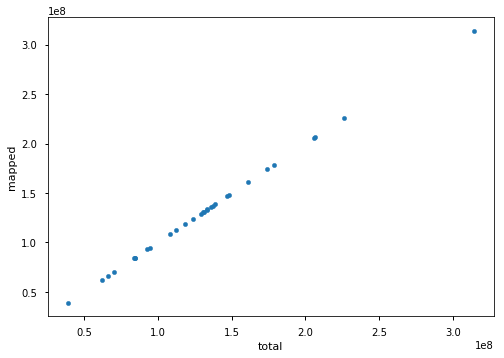

In [12]:
read_depth_df.plot(x='total', y='mapped', kind='scatter')

In [13]:
# Output distribution of total and mapped reads
read_depth_df.describe()

,total,mapped
count,3.000000e+01,3.000000e+01
mean,1.325271e+08,1.323409e+08
std,5.600751e+07,5.593092e+07
min,3.915586e+07,3.909243e+07
25%,9.347522e+07,9.334391e+07
50%,1.309524e+08,1.307663e+08
75%,1.478634e+08,1.476477e+08
max,3.142602e+08,3.138446e+08
